Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
for df in [transactions, items, item_categories, shops]:
    print(df.shape)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [6]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
transactions['date_dt'] = pd.to_datetime(transactions.date, dayfirst=True, format="%d.%m.%Y")
transactions['month'] = transactions.date_dt.dt.month
transactions['year'] = transactions.date_dt.dt.year
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_dt,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1,2013


In [33]:
# filter the dataframe
filtered_values = np.where((transactions.month == 9) & (transactions.year == 2014))
transactions_sep14 = transactions.loc[filtered_values]

# calculate the total amount received for each line item
transactions_sep14['amount'] = transactions_sep14.item_price * transactions_sep14.item_cnt_day
# group by shop and sum the total amount received
transactions_sep14_by_shop = transactions_sep14.groupby('shop_id')['amount'].sum().max()

# get the maximum
max_revenue = transactions_sep14_by_shop.max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [12]:
# filter the dataframe
filtered_values = np.where(((transactions.month == 6) | (transactions.month == 7)  | (transactions.month == 8)) 
                           & (transactions.year == 2014))
transactions_summer14 = transactions.loc[filtered_values]

# determine revenue per line item
transactions_summer14['revenue'] = transactions_summer14.item_price * transactions_summer14.item_cnt_day

# merge with 'items' to identify category ids
transactions_items_summer14 = transactions_summer14.merge(items, how='left', on='item_id')

# group by category_id and sum revenue to calculate revenue for each category
revenue_by_category = transactions_items_summer14.groupby('item_category_id')['revenue'].sum()
# identify the category with the maximum revenue
max_revenue_idx = np.argmax(revenue_by_category)

category_id_with_max_revenue = max_revenue_idx
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [13]:
# group the rows by item_id and price and count the number of line items
transactions_by_item_and_price = pd.DataFrame(transactions.groupby(
    ['item_id', 'item_price'])['date'].count()).reset_index(drop=False)
value_counts = pd.DataFrame(transactions_by_item_and_price.item_id.value_counts()).reset_index(drop=False)
value_counts.columns = ['item_id', 'unique_price_count']

# filter out all those counts greater than 1
filtered_counts = value_counts.loc[np.where(value_counts.unique_price_count == 1)]
# count the number of unique items in the list
nunique = filtered_counts.item_id.nunique()

num_items_constant_price = nunique
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [ ]:
cond=(transactions['month']==12) & (transactions['year']==2014) &(transactions['shop_id']==25)
# IGNORE !!!!& (transactions['item_cnt_day']>0)
var_pd=transactions[cond].groupby(['date'])['item_cnt_day'].sum()

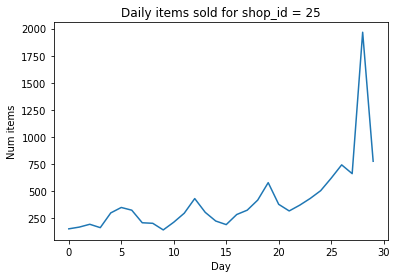

Current answer for task total_num_items_sold_var is: 117167.702299


In [60]:
# filter the dataframe
shop_id = 25

filtered_values = np.where((transactions.month == 12) & (transactions.year == 2014) & (transactions.shop_id == shop_id))
transactions_dec14 = transactions.loc[filtered_values]
transactions_dec14

# count the number of transactions by date
transactions_dec14_by_date = transactions_dec14.groupby('date')['item_cnt_day'].sum()

# plot the result
total_num_items_sold = transactions_dec14_by_date.values
days = range(len(transactions_dec14_by_date.index))

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily items sold for shop_id = 25")
plt.show()

# compute the (unbiased) variance
total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

# Authorization & Submission

To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. Note: Token expires 30 minutes after generation.

In [61]:
STUDENT_EMAIL = "nikkifitzherbert@gmail.com"
STUDENT_TOKEN = "CU7voBC7xTTK6KoT"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [62]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)